# Linear Regression
diabetes dataset description:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html    
https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset  
linear regression model:  
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [3]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
diabetes = datasets.load_diabetes()

# use all of features 
diabetes_X = diabetes.data
diabetes_y = diabetes.target
#print(diabetes_y)

print("diabetes_X shape: {}".format(diabetes_X.shape))
print("diabetes_y shape: {}".format(diabetes_y.shape))


#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

#Build Linear regression model
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))                         

diabetes_X shape: (442, 10)
diabetes_y shape: (442,)
Coefficients: [ -26.2759041  -231.92697391  566.49859849  303.08631061 -709.86807128
  428.67719627   82.12319677  165.60628133  729.33691844   42.58281733]

Mean squared error: 3319.6925871395597
R2 score: 0.3174949176473588


Coefficients: [717.54004052]

Mean squared error: 3852.2115862986325
R2 score: 0.20801281536373262


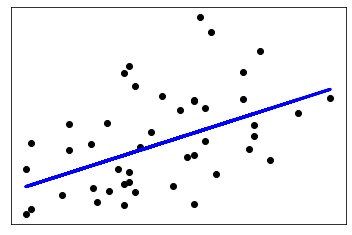

In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
diabetes = datasets.load_diabetes()

# Use attribute 3 as the data (total 10 vector) 
diabetes_X = diabetes.data[:, None, 3]

diabetes_y = diabetes.target

#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

#Build Linear regression model
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))
                                      
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Polynomial Regression
linear regression model:  
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

print('X is \n{}'.format(X))

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X) # mean fit + transform

print('X_poly is \n{}'.format(X_poly))

X is 
[[0 1]
 [2 3]
 [4 5]]
X_poly is 
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# create 100 data points that is uniformly in the range [0, 10] 
X = np.linspace(0, 10, 100)
np.random.shuffle(X)
X = X.reshape(-1,1)
y = f(X)
print('after reshaping, shape of X is {}'.format(X.shape))

# show origin X data (only the first 5 data points)
print('origin X is {}:'.format(X[:5]))

poly = PolynomialFeatures(degree=2).fit(X)
X_poly = poly.transform(X)

# show poly transform X data (only the first 5 data points)
print('after ploy transform X is {}:'.format(X_poly[:5]))


X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(r2_score(y_test, y_pred)))

after reshaping, shape of X is (100, 1)
origin X is [[1.01010101]
 [5.65656566]
 [6.86868687]
 [4.24242424]
 [3.93939394]]:
after ploy transform X is [[ 1.          1.01010101  1.02030405]
 [ 1.          5.65656566 31.99673503]
 [ 1.          6.86868687 47.1788593 ]
 [ 1.          4.24242424 17.99816345]
 [ 1.          3.93939394 15.51882461]]:
Coefficients: [[ 0.         -2.89195639  4.06568914]]

Mean squared error: 14.752825712412204
Variance score: -0.0068023029359898235


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * x - 3 *x  + 1


# create 100 data points that is uniformly in the range [0, 10] 
X = np.linspace(0, 10, 100)
np.random.shuffle(X)
X = X.reshape(-1,1)
y = f(X)
print('after reshaping, shape of X is {}'.format(X.shape))

# show origin X data (only the first 5 data points)
print('origin X is {}:'.format(X[:5]))

poly = PolynomialFeatures(degree=2).fit(X)
X_poly = poly.transform(X)

# show poly transform X data (only the first 5 data points)
print('after ploy transform X is {}:'.format(X_poly[:5]))


X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(r2_score(y_test, y_pred)))

after reshaping, shape of X is (100, 1)
origin X is [[0.60606061]
 [9.09090909]
 [2.12121212]
 [3.73737374]
 [8.58585859]]:
after ploy transform X is [[ 1.          0.60606061  0.36730946]
 [ 1.          9.09090909 82.6446281 ]
 [ 1.          2.12121212  4.49954086]
 [ 1.          3.73737374 13.96796245]
 [ 1.          8.58585859 73.71696766]]:
Coefficients: [[ 0.         -9.13719817 31.56311501]]

Mean squared error: 3.591289271018656e-29
Variance score: 1.0


rmse is 11.901779012038904
R2 is 0.9830071790386679


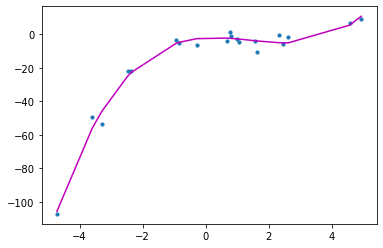

In [18]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('rmse is {}'.format(rmse))
print('R2 is {}'.format(r2))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

# Lasso, Ridge, Elastic Net  
lasso model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html   
ridge model: https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.Ridge.html  
elastic net: https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.ElasticNet.html

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
diabetes = datasets.load_diabetes()

# use all of features 
diabetes_X = diabetes.data
diabetes_y = diabetes.target

print("diabetes_X shape: {}".format(diabetes_X.shape))
print("diabetes_y shape: {}".format(diabetes_y.shape))


#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

#Build model
model = linear_model.Lasso(alpha=0.1)
#model = linear_model.Ridge(alpha=1.0)
#model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))

diabetes_X shape: (442, 10)
diabetes_y shape: (442,)
Coefficients: [  -0.         -151.56895849  566.82501586  250.90395361  -33.16139056
   -0.         -201.40901228    0.          479.2968561     8.80738069]

Mean squared error: 3458.8918346487935
R2 score: 0.28887654670157903
number of model coef: 7


In [3]:
mask = (model.coef_ != 0)
print(model.coef_)
print(mask)
print('before feature extraction, diabete_X shape: {}'.format(diabetes_X.shape))
diabetes_X = diabetes_X[:, mask]
print('after feature extraction, diabete_X shape: {}'.format(diabetes_X.shape))

[  -0.         -151.56895849  566.82501586  250.90395361  -33.16139056
   -0.         -201.40901228    0.          479.2968561     8.80738069]
[False  True  True  True  True False  True False  True  True]
before feature extraction, diabete_X shape: (442, 7)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 7 but corresponding boolean dimension is 10

In [9]:
import numpy as np
my_numpy = np.array([1,2,3,4,5])
bool_index = my_numpy > 3
print(bool_index)
print(my_numpy[bool_index])

[False False False  True  True]
[4 5]
